In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [3]:
# Load Train & Test
train = 0
validation = 0
cwd = os.getcwd()
folder = '/content/drive/MyDrive/train_data/train'
for subfolder in os.listdir(folder):
  path, dir, files = next(os.walk(os.path.join(folder, subfolder)))
  train += len(files)

folder = '/content/drive/MyDrive/train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    validation +=len(files)

(train, validation)

(432, 164)

In [4]:
# Key parameters
img_width, img_height = 48,48
train_dir = '/content/drive/MyDrive/train_data/train'
test_dir = '/content/drive/MyDrive/train_data/test'
nb_train_samples = train
nb_validation_samples = validation
batch_size = 16
epochs = 10
num_classes = 2

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')


Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [6]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [7]:
for layer in model.layers[:10]:
  layer.trainable = False

In [8]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'sigmoid')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(
    loss='categorical_crossentropy',
    optimizer=Adamax(learning_rate=0.0001),
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 12,979,200 (49.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [10]:
history = model_final.fit(
train_generator, steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size,
epochs = epochs, validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.8318 - loss: 0.3384 - val_accuracy: 0.9500 - val_loss: 0.1295
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9834 - loss: 0.0464 - val_accuracy: 0.9688 - val_loss: 0.0737
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9962 - loss: 0.0212 - val_accuracy: 0.9625 - val_loss: 0.0802
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9824 - loss: 0.0574 - val_accuracy: 0.9312 - val_loss: 0.1602
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9985 - loss: 0.0083 - val_accuracy: 0.9438 - val_loss: 0.1096
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9982 - loss: 0.0137 - val_accuracy: 0.9375 - val_loss: 0.2388
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.9933 - loss: 0.0131 - val_accuracy: 0.9500 - val_loss: 0.1331
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9375 

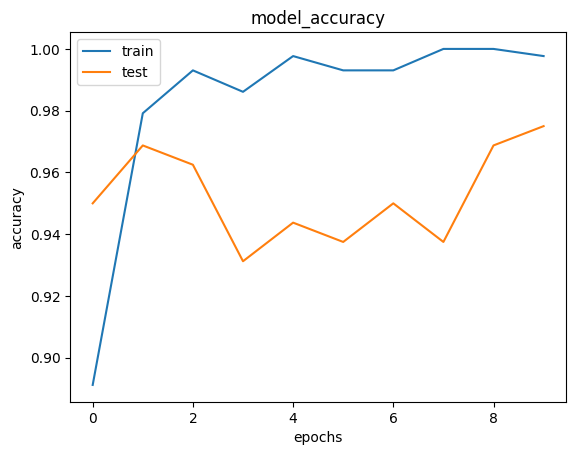

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

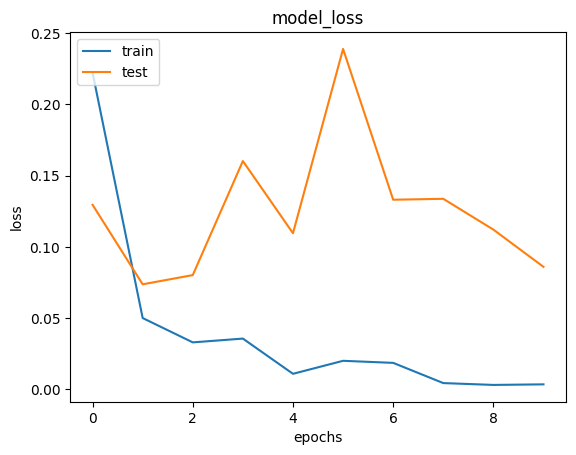

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [13]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [14]:
def make_predictions(img):
  img = cv2.imread(img)
  img = cv2.resize(img, (48,48))
  img = img.astype('float32') / 255.0
  # (1, 48, 48, 3) -> 4D Tensor
  img = np.expand_dims(img, axis = 0)
  prediction = model_final.predict(img)
  intId = np.argmax(prediction[0])
  label = class_dictionary[intId]
  return label

In [15]:
make_predictions('/content/drive/MyDrive/train_data/test/empty/spot224.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'no_car'

In [16]:
make_predictions('/content/drive/MyDrive/train_data/test/occupied/spot136.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'car'

In [17]:
model_final.save("model_final.h5")